In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)

### Extract the crowdfunding.xlsx Data

In [3]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [4]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [5]:
# Get the crowdfunding_info_df columns.
crowdfunding_info_df.columns

Index(['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_at',
       'deadline', 'staff_pick', 'spotlight', 'category & sub-category'],
      dtype='object')

In [6]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[['category','subcategory']] = \
crowdfunding_info_df['category & sub-category'].str.split('/', n=2, expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [7]:
# Get the unique categories and subcategories in separate lists.

categories = crowdfunding_info_df['category'].unique().tolist()
subcategories = crowdfunding_info_df['subcategory'].unique().tolist()

print(f'categories list : {categories}) \n')

print(f'Sub-categories list : {subcategories}')

categories list : ['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism']) 

Sub-categories list : ['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


In [8]:
# Get the number of distinct values in the categories and subcategories lists.
print(f'Distinct values in Categories: {len(categories)} \n')
print(f'Distinct values in Sub-categories: {len(subcategories)}')

Distinct values in Categories: 9 

Distinct values in Sub-categories: 24


In [9]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [10]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids = []
for x in category_ids:
    cat_ids.append(f'cat{x}')

# Use a list comprehension to add "subcat" to each subcategory_id.   
subcat_ids = []
for y in subcategory_ids:
    subcat_ids.append(f'subcat{y}')

    
print(f'cat categories_ids:{cat_ids}\n')
print(f'subcat subcategories_ids: {subcat_ids}')



cat categories_ids:['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']

subcat subcategories_ids: ['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [11]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df = pd.DataFrame({'category_id': cat_ids,'category': categories})



In [12]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [13]:
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_df = pd.DataFrame({'subcategory_id': subcat_ids,'subcategory': subcategories})

In [14]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [15]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [16]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [17]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df= campaign_df.rename(columns={'blurb': 'description', 'launched_at':'launched_date', 'deadline':'end_date'})
campaign_df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300,153216,successful,2043,US,USD,1609221600,1622350800,False,True,food/food trucks,food,food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600,4814,failed,112,US,USD,1634274000,1638252000,False,False,theater/plays,theater,plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600,4603,canceled,139,IT,EUR,1636174800,1639116000,False,False,theater/plays,theater,plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600,37823,failed,374,US,USD,1602133200,1618117200,False,True,music/indie rock,music,indie rock


In [18]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df= campaign_df.astype({'goal': float, 'pledged':float})
campaign_df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,1609221600,1622350800,False,True,food/food trucks,food,food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,1634274000,1638252000,False,False,theater/plays,theater,plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,1636174800,1639116000,False,False,theater/plays,theater,plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,1602133200,1618117200,False,True,music/indie rock,music,indie rock


In [19]:
# Check the datatypes
campaign_df.dtypes

cf_id                        int64
contact_id                   int64
company_name                object
description                 object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launched_date                int64
end_date                     int64
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object

In [20]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt
campaign_df["launched_date"] = pd.to_datetime(campaign_df["launched_date"], unit='s').dt.strftime('%Y-%m-%d') 
campaign_df["end_date"] = pd.to_datetime(campaign_df["end_date"], unit='s').dt.strftime('%Y-%m-%d')
# By specifying unit='s' indicates that the values in the column are Unix timestamps (seconds since January 1, 1970)
#.strftime() method to format the datetime values as strings in the 'YYYY-MM-DD' format. This converts the datetime
# objects to string representations of dates.
campaign_df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25,2021-05-25,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17,2021-12-30,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21,2022-01-17,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21,2021-08-23,False,False,theater/plays,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29,2021-05-30,False,True,food/food trucks,food,food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15,2021-11-30,False,False,theater/plays,theater,plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06,2021-12-10,False,False,theater/plays,theater,plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08,2021-04-11,False,True,music/indie rock,music,indie rock


In [21]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
merged_df = pd.merge(campaign_df, category_df, on="category")
campaign_merged_df = pd.merge(merged_df, subcategory_df, on="subcategory")

campaign_merged_df.tail(10)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,399,5983,"Dixon, Perez and Banks",Re-engineered encompassing definition,8300.0,2111.0,failed,57,CA,CAD,2021-12-29,2022-01-16,False,False,photography/photography books,photography,photography books,cat8,subcat15
991,1378,2873,Clements Ltd,Persistent bandwidth-monitored framework,3700.0,1343.0,failed,52,US,USD,2020-07-07,2021-07-27,False,False,photography/photography books,photography,photography books,cat8,subcat15
992,806,2961,Walter Inc,Streamlined 5thgeneration intranet,10000.0,8142.0,failed,263,AU,AUD,2020-12-20,2021-01-31,False,False,photography/photography books,photography,photography books,cat8,subcat15
993,1563,3043,"Sanders, Farley and Huffman",Cross-group clear-thinking task-force,172000.0,55805.0,failed,1691,US,USD,2021-04-08,2021-12-18,True,False,photography/photography books,photography,photography books,cat8,subcat15
994,1951,6013,Rodriguez-Robinson,Ergonomic methodical hub,5900.0,4997.0,failed,114,IT,EUR,2021-07-23,2021-11-25,False,True,photography/photography books,photography,photography books,cat8,subcat15
995,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,2021-07-03,2021-07-08,False,True,photography/photography books,photography,photography books,cat8,subcat15
996,1095,3565,Young and Sons,Innovative disintermediate encryption,2400.0,4596.0,successful,144,US,USD,2020-11-28,2021-02-28,False,False,journalism/audio,journalism,audio,cat9,subcat24
997,1388,4517,Valenzuela-Cook,Total incremental productivity,6700.0,7496.0,successful,300,US,USD,2021-01-04,2021-10-04,False,False,journalism/audio,journalism,audio,cat9,subcat24
998,2448,2389,Little Ltd,Decentralized bandwidth-monitored ability,6900.0,12155.0,successful,419,US,USD,2021-01-25,2021-04-18,False,False,journalism/audio,journalism,audio,cat9,subcat24
999,602,2153,Giles-Smith,Right-sized web-enabled intranet,9700.0,11929.0,successful,331,US,USD,2022-02-01,2022-02-16,False,False,journalism/audio,journalism,audio,cat9,subcat24


In [22]:
# Drop unwanted columns
campaign_cleaned = campaign_merged_df.loc[:, ['cf_id', 'contact_id', 'company_name', 'description', 'goal', 'pledged', 'outcome', 'backers_count',
                                               'country', 'currency', 'launched_date', 'end_date', 'category_id', 'subcategory_id' ]]
campaign_cleaned.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13,2021-03-01,cat1,subcat1
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,2020-06-20,2021-01-30,cat1,subcat1
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,2020-11-29,2021-06-11,cat1,subcat1
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process improvement,142400.0,21307.0,failed,296,US,USD,2020-05-05,2021-05-30,cat1,subcat1
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,2021-01-29,2021-02-13,cat1,subcat1


### Campaign Analysis

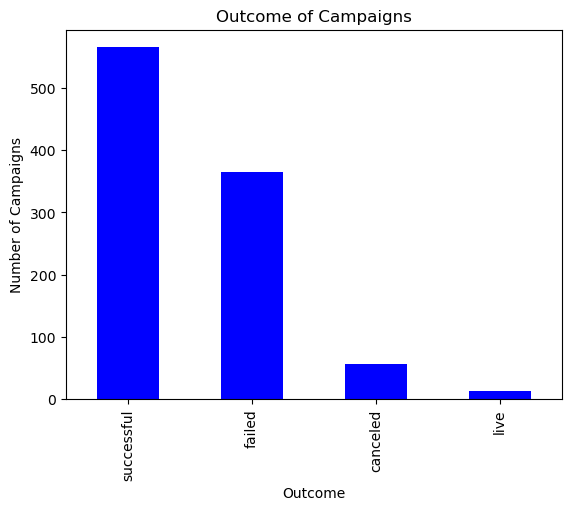

In [23]:
# plot bar chart for successful and failed campaigns
outcome_count = campaign_cleaned['outcome'].value_counts()
outcome_count.plot(kind='bar', color='blue')
plt.title('Outcome of Campaigns')
plt.xlabel('Outcome')
plt.ylabel('Number of Campaigns')
plt.show()




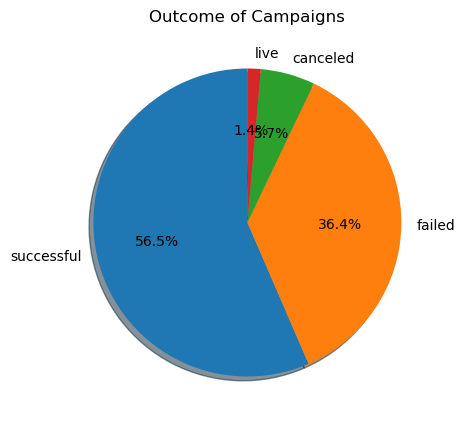

In [35]:
# plot pie chart for successful and failed campaigns

# move values for pie chart
outcome_count.plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90, fontsize=10, figsize=(5,5))
plt.title('Outcome of Campaigns')
plt.ylabel('')
plt.show()

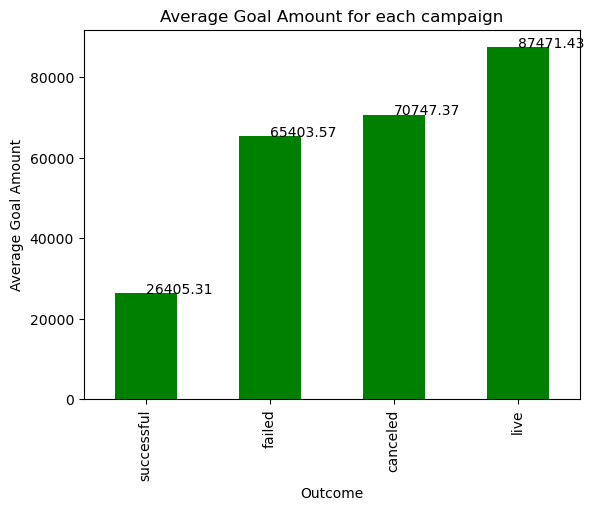

In [28]:
# average goal amount for each outcome
goal_amount = campaign_cleaned.groupby('outcome')['goal'].mean()

# sort the values in ascending order
goal_amount.sort_values(ascending=True, inplace=True)

# plot bar chart for average goal amount for each campaign
goal_amount.plot(kind='bar', color='green')
plt.title('Average Goal Amount for each campaign')
plt.xlabel('Outcome')
plt.ylabel('Average Goal Amount')

# annotate the bar chart with the values
for index, value in enumerate(goal_amount):
    plt.text(index, value, str(round(value, 2)))
    

plt.show()


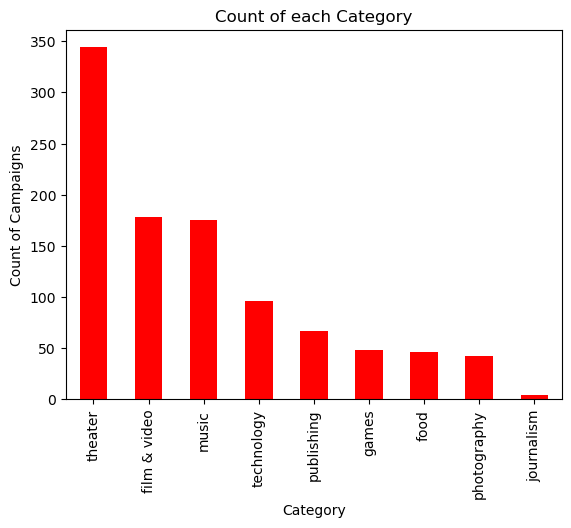

In [45]:
# count of each category
category_count = campaign_merged_df['category'].value_counts()

# plot bar chart for count of each category
category_count.plot(kind='bar', color='red')
plt.title('Count of each Category')
plt.xlabel('Category')
plt.ylabel('Count of Campaigns')
plt.show()

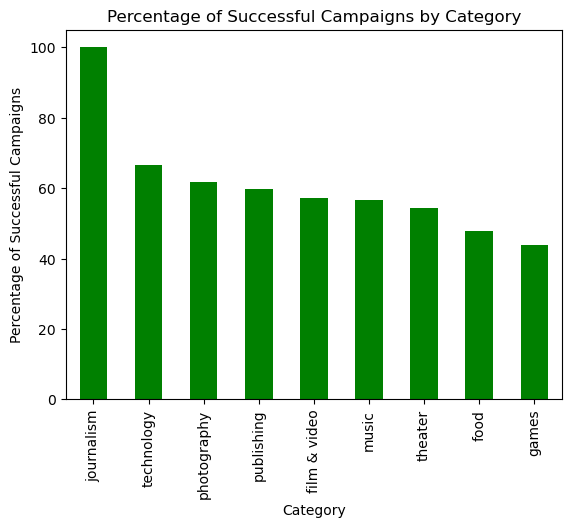

In [44]:
# percentage of successful campaigns by category
category_success = campaign_merged_df[campaign_merged_df['outcome'] == 'successful']['category'].value_counts()

category_success_rate = (category_success/category_count)*100
category_success_rate.sort_values(ascending=False, inplace=True)

# plot bar chart for percentage of successful campaigns by category
category_success_rate.plot(kind='bar', color='green')   
plt.title('Percentage of Successful Campaigns by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Successful Campaigns')
plt.show()



In [22]:
# Export the DataFrame as a CSV file. 
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

### Extract the contacts.xlsx Data.

In [23]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=3)
contact_info_df.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [24]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json
first_row = contact_info_df.iloc[0][0]

# extract just the values from the rows of json data
# start on row 1 to skip the header row
dict_values = json.loads(first_row)

# Print out the list of values for each row.
for k, v in dict_values.items():
    print(k)
    print(v)


contact_id
4661
name
Cecilia Velasco
email
cecilia.velasco@rodrigues.fr


In [25]:
values = []
col_names = []

for i, row in contact_info_df.iterrows():
    # extract just the values from the rows of json data
    data = row[0]
    # start on row 1 to skip the header row
    dict_values = json.loads(data)
    columns = [k for k,v in dict_values.items()]
    row_values = [v for k,v in dict_values.items()]
    
    col_names.append(columns)
    values.append(row_values)
    
print(values)

[[4661, 'Cecilia Velasco', 'cecilia.velasco@rodrigues.fr'], [3765, 'Mariana Ellis', 'mariana.ellis@rossi.org'], [4187, 'Sofie Woods', 'sofie.woods@riviere.com'], [4941, 'Jeanette Iannotti', 'jeanette.iannotti@yahoo.com'], [2199, 'Samuel Sorgatz', 'samuel.sorgatz@gmail.com'], [5650, 'Socorro Luna', 'socorro.luna@hotmail.com'], [5889, 'Carolina Murray', 'carolina.murray@knight.com'], [4842, 'Kayla Moon', 'kayla.moon@yahoo.de'], [3280, 'Ariadna Geisel', 'ariadna.geisel@rangel.com'], [5468, 'Danielle Ladeck', 'danielle.ladeck@scalfaro.net'], [3064, 'Tatiana Thompson', 'tatiana.thompson@hunt.net'], [4904, 'Caleb Benavides', 'caleb.benavides@rubio.com'], [1299, 'Sandra Hardy', 'sandra.hardy@web.de'], [5602, 'Lotti Morris', 'lotti.morris@yahoo.co.uk'], [5753, 'Reinhilde White', 'reinhilde.white@voila.fr'], [4495, 'Kerry Patel', 'kerry.patel@hutchinson.com'], [4269, 'Sophie Antoine', 'sophie.antoine@andersen.com'], [2226, 'Martha Girard', 'martha.girard@web.de'], [1558, 'Stephanie King', 'step

In [27]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.

contact_info_df = pd.DataFrame(values, columns=col_names[0])

contact_info_df.head()

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [28]:
# Check the datatypes.
contact_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   name        1000 non-null   object
 2   email       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [29]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
contact_info_df[['first_name','last_name']] = contact_info_df['name'].str.split(' ', n=1, expand=True)

# Drop the contact_name column
contact_info_df = contact_info_df.drop(columns=['name'])


In [30]:
contact_info_df.head()

,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [31]:
# Reorder the columns
contact_info_df = contact_info_df[['contact_id', 'first_name', 'last_name', 'email', ]]
contact_info_df.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [32]:
# Check the datatypes one more time before exporting as CSV file.
contact_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [33]:
# save clean dataframe
contacts_df_clean = contact_info_df

In [34]:
# Export the DataFrame as a CSV file. 
contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

# Did not use Option 2